<a href="https://colab.research.google.com/github/shamali18/Stock-Price-Prediction/blob/main/Proj_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Libraries for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Library for fetching stock data from Yahoo
from pandas_datareader.data import DataReader

# Library for time stamps
from datetime import datetime

In [ ]:
# Analyzing the airlines stock
# Abbreviations used for airlines
# UAL : United Airlines Holdings, Inc.
# DAL : Delta Air Lines, Inc.
# ALK : Alaska Air Group, Inc.
# LUV : Southwest Airlines Co.
airlines = ['UAL', 'DAL', 'ALK', 'LUV']

# Setting up start date and end date for fetching each stock data
end = datetime.now()
start='2012-01-01'

#start = datetime(end.year - 1, end.month, end.day)

# Setting a for loop to get the datasets for all the four stocks.
# Setting each DataFrame name with the actual stock abbreviations.
for stock in airlines:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [ ]:
DAL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,8.300000,8.020000,8.230000,8.040000,7093200.0,7.141504
2012-01-04,8.140000,7.830000,8.030000,8.010000,7412900.0,7.114857
2012-01-05,8.350000,7.870000,8.030000,8.330000,10509800.0,7.399095
2012-01-06,8.430000,8.240000,8.260000,8.320000,6683300.0,7.390213
2012-01-09,8.500000,8.260000,8.340000,8.280000,9015700.0,7.354685
...,...,...,...,...,...,...
2020-11-25,41.490002,40.049999,40.799999,41.290001,14588900.0,41.290001
2020-11-27,42.189999,40.779999,41.790001,41.060001,10516600.0,41.060001
2020-11-30,41.049999,39.349998,40.529999,40.250000,16732600.0,40.250000


In [ ]:
# Combining all the four stock dataframes into one, airlines_df dataframe
# We have done this to perform Exploratory Data Analysis on our datasets

airline_list = [UAL, DAL, ALK, LUV]
airline_name = ["United", "Delta", "Alaska", "Southwest"]

for airline, air_name in zip(airline_list, airline_name):
    airline["airline_name"] = air_name
    
airlines_df = pd.concat(airline_list, axis=0)

In [ ]:
# Let's have a look at our combined dataframe. 
airlines_df

,High,Low,Open,Close,Volume,Adj Close,airline_name
Date,,,,,,,
2012-01-03,19.270000,18.740000,19.230000,18.900000,3910000.0,18.900000,United
2012-01-04,19.200001,18.440001,18.900000,18.520000,5809200.0,18.520000,United
2012-01-05,18.590000,17.670000,18.450001,18.389999,8124800.0,18.389999,United
2012-01-06,18.549999,18.170000,18.500000,18.209999,3904500.0,18.209999,United
2012-01-09,18.350000,17.850000,18.350000,17.930000,5323200.0,17.930000,United
...,...,...,...,...,...,...,...
2020-11-24,49.230000,47.650002,48.900002,48.250000,12108800.0,48.250000,Southwest
2020-11-25,48.570000,47.500000,48.470001,48.270000,7281800.0,48.270000,Southwest
2020-11-27,48.740002,47.650002,48.250000,47.730000,4051900.0,47.730000,Southwest


In [ ]:
# Having a look at our dataframe
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8976 entries, 2012-01-03 to 2020-12-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          8976 non-null   float64
 1   Low           8976 non-null   float64
 2   Open          8976 non-null   float64
 3   Close         8976 non-null   float64
 4   Volume        8976 non-null   float64
 5   Adj Close     8976 non-null   float64
 6   airline_name  8976 non-null   object 
dtypes: float64(6), object(1)
memory usage: 561.0+ KB


In [ ]:
#Checking for null values in the data
airlines_df.isnull().sum()

High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
airline_name    0
dtype: int64

In [ ]:
# Library for checking missing values
!pip install missingno

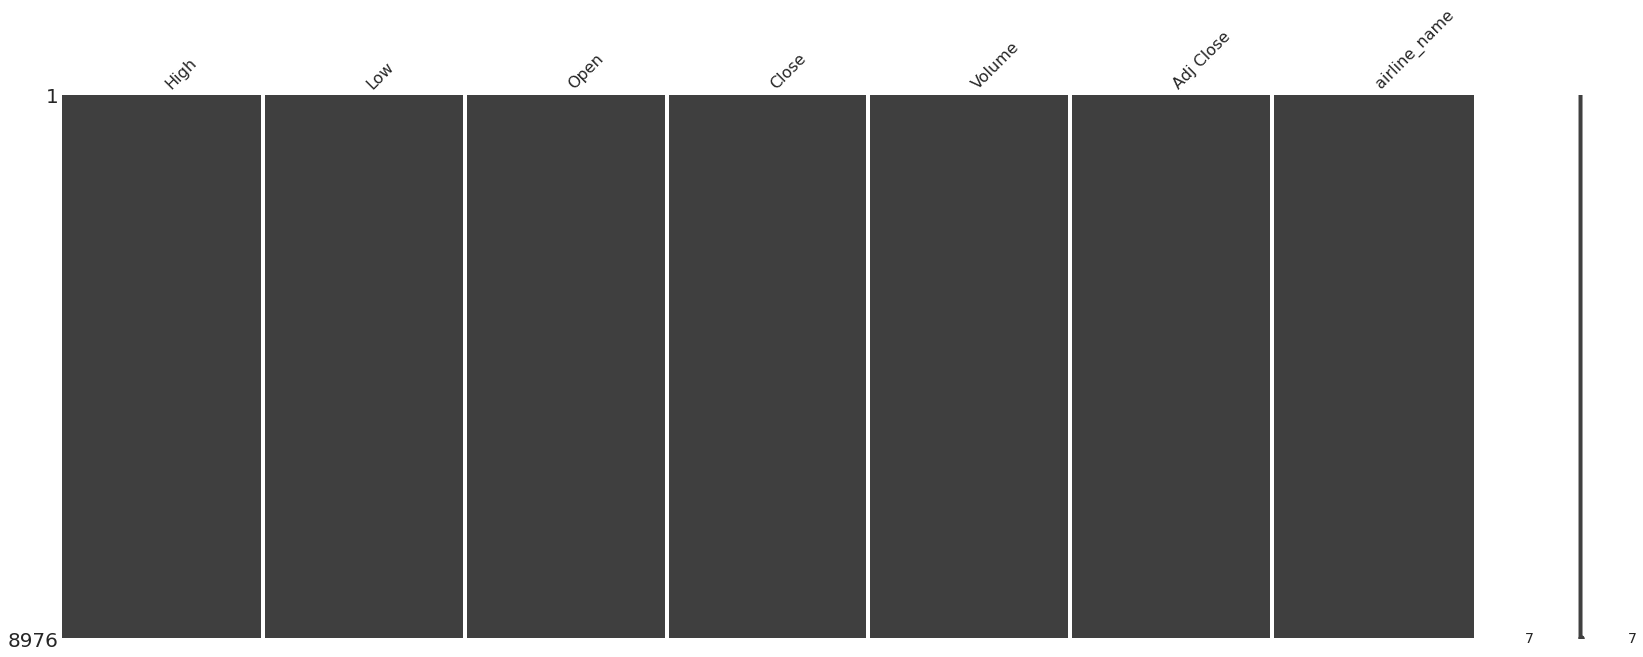

In [ ]:
# Checking missing values in our combined airlines dataframe
import missingno as msno
msno.matrix(airlines_df)

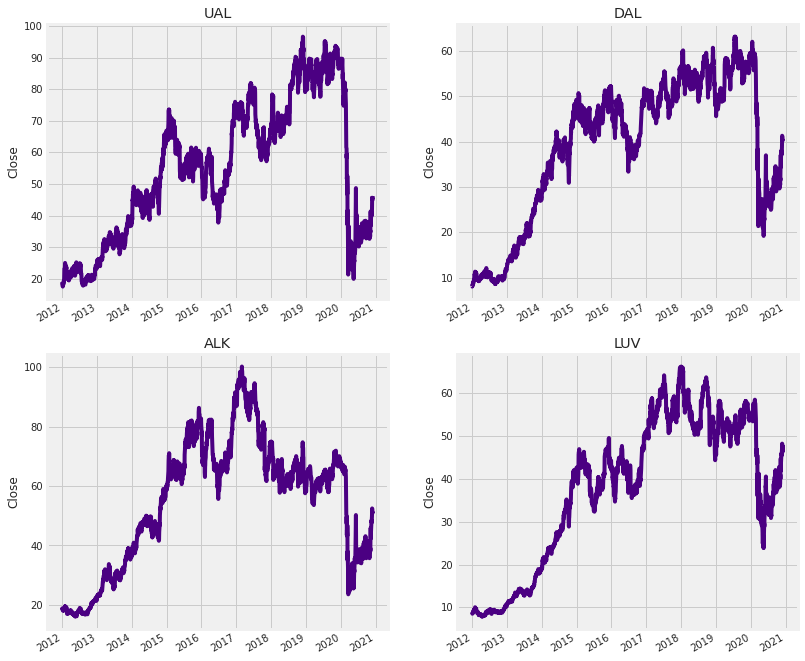

In [ ]:
# Plotting the historical closing price for all the four stocks.

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, airline in enumerate(airline_list, 1):
    plt.subplot(2, 2, i)
    airline['Close'].plot(color='indigo')
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{airlines[i - 1]}")

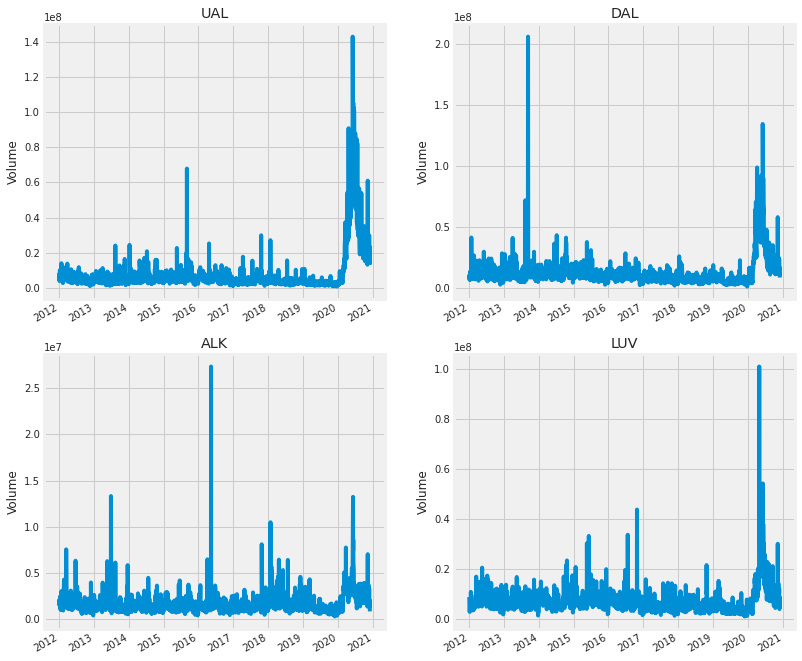

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, airline in enumerate(airline_list, 1):
    plt.subplot(2, 2, i)
    airline['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{airlines[i - 1]}")

In [ ]:
# Fetch all closing prices of each stock in a new dataframe
close_df = DataReader(airlines, 'yahoo', start, end)['Close']
# View the new dataframe close_df
close_df.tail() 

Symbols,UAL,DAL,ALK,LUV
Date,,,,
2020-11-24,44.959999,41.259998,52.369999,48.250000
2020-11-25,45.639999,41.290001,52.470001,48.270000
2020-11-27,45.299999,41.060001,51.549999,47.730000
2020-11-30,45.049999,40.250000,50.970001,46.340000
2020-12-01,46.119999,40.595001,51.470001,47.884998


In [ ]:
# Find the daily change in all the stocks
# Use the pct_change() function to find the daily percentage change
air_pct_change = close_df.pct_change()
air_pct_change.tail()

Symbols,UAL,DAL,ALK,LUV
Date,,,,
2020-11-24,0.098461,0.063676,0.053298,0.030763
2020-11-25,0.015125,0.000727,0.001910,0.000415
2020-11-27,-0.007450,-0.005570,-0.017534,-0.011187
2020-11-30,-0.005519,-0.019727,-0.011251,-0.029122
2020-12-01,0.023751,0.008571,0.009810,0.033340


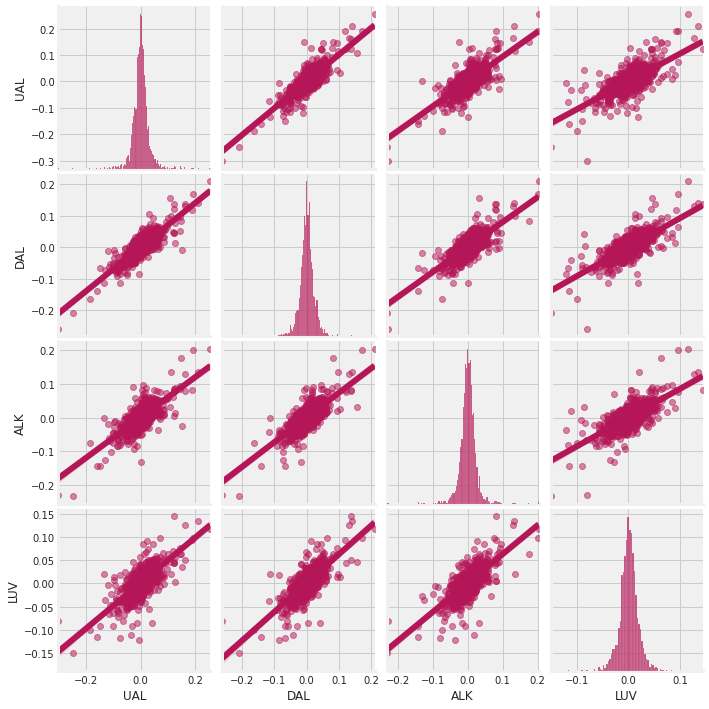

In [ ]:
sns.pairplot(air_pct_change, 
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#B51657'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#B51657'}}, diag_kws= {'color': '#B51657'})

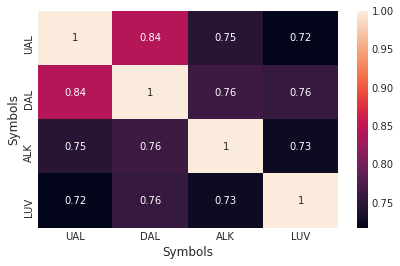

In [ ]:
# Correlation plot of daily percentage change
sns.heatmap(air_pct_change.corr(), annot=True, cmap='rocket')

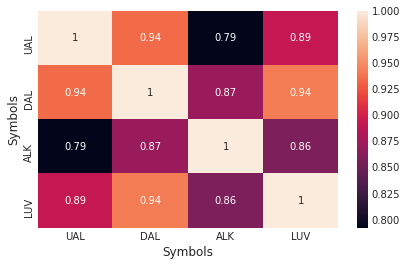

In [ ]:
# Correlation plot of closing prices
sns.heatmap(close_df.corr(), annot=True, cmap='rocket')

<h1><strong>LSTM</h1>

<h3><strong>Predicting stock prices for UAL</h3>

In [ ]:
# Get the stock prices for United Airlines (UAL) from 01-01-2012 to today
ual_df = DataReader('UAL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# View the generated dataframe
ual_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,19.270000,18.740000,19.230000,18.900000,3910000,18.900000
2012-01-04,19.200001,18.440001,18.900000,18.520000,5809200,18.520000
2012-01-05,18.590000,17.670000,18.450001,18.389999,8124800,18.389999
2012-01-06,18.549999,18.170000,18.500000,18.209999,3904500,18.209999
2012-01-09,18.350000,17.850000,18.350000,17.930000,5323200,17.930000
...,...,...,...,...,...,...
2020-11-24,45.000000,42.450001,42.709999,44.959999,29934600,44.959999
2020-11-25,45.910000,43.650002,44.490002,45.639999,24250800,45.639999
2020-11-27,46.759998,45.139999,46.200001,45.299999,14103900,45.299999


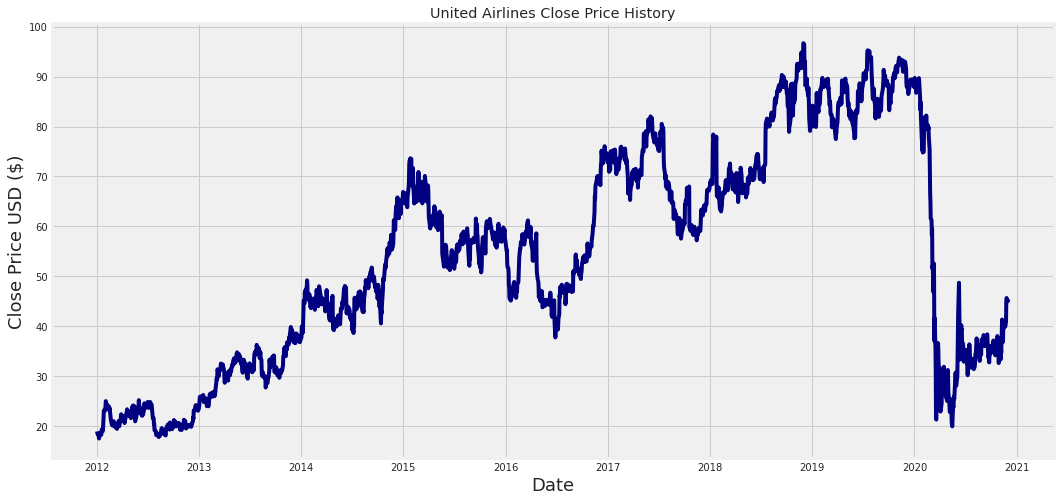

In [ ]:
# View the closing price history of UAL
plt.figure(figsize=(16,8))
plt.title('United Airlines Close Price History')
plt.plot(ual_df['Close'], color='navy')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Creating a new dataframe containing the close column of the UAL stocks
data = ual_df.filter(['Close'])
# Converting the UAL dataframe closing stocks to a numpy array
ual_dataset = data.values
# Getting the number of rows to train the model
training_data_len = int(np.ceil( len(ual_dataset) * .8 ))
# Viewing the length of the DAL training dataset
training_data_len

1796

In [ ]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(ual_dataset)
# Viewing the scaled data
scaled_data

array([[0.01792477],
       [0.01312801],
       [0.011487  ],
       ...,
       [0.35117395],
       [0.34801818],
       [0.35142642]])

In [ ]:
# Creating the scaled training data set for UAL
train_data = scaled_data[0:int(training_data_len), :]
# Splitting the data into x_train and y_train data sets for UAL
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01792477, 0.01312801, 0.011487  , 0.00921484, 0.00568039,
       0.        , 0.00669024, 0.01325424, 0.01199193, 0.00946731,
       0.00971977, 0.02108054, 0.02335269, 0.0184297 , 0.02423631,
       0.03698561, 0.05326939, 0.07081546, 0.06955315, 0.07094169,
       0.07233022, 0.08343854, 0.09454683, 0.08520576, 0.08558446,
       0.08078768, 0.08230246, 0.07914669, 0.08192376, 0.07687453,
       0.07169907, 0.07826308, 0.07434993, 0.04746277, 0.04367585,
       0.03988892, 0.03698561, 0.03269377, 0.03913154, 0.04001515,
       0.03698561, 0.04367585, 0.03774299, 0.03029538, 0.02915932,
       0.03130522, 0.029538  , 0.0270134 , 0.02966423, 0.02448877,
       0.03673315, 0.03117901, 0.03963647, 0.0446857 , 0.03887907,
       0.03105278, 0.03875284, 0.04405453, 0.04354962, 0.05566776])]
[0.0613481541212865]

[array([0.01792477, 0.01312801, 0.011487  , 0.00921484, 0.00568039,
       0.        , 0.00669024, 0.01325424, 0.01199193, 0.00946731,
       0.00971977, 0.02108054, 0.023

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Buliding the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1736/1736 [==============================] - 44s 25ms/step - loss: 0.0026


In [ ]:
# Creating the testing data set for UAL
test_data = scaled_data[training_data_len - 60: , :]
# Creating the data sets x_test and y_test for UAL
x_test = []
y_test = ual_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get predicted price values from the model 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Viewing the RMSE
rmse

3.965659132172525

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


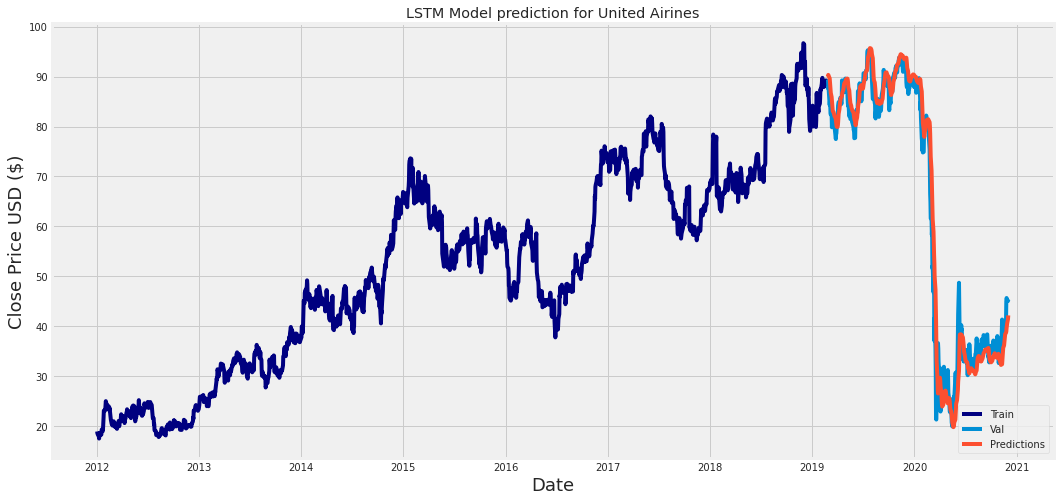

In [ ]:
# Plot the data
train = data[:training_data_len]
ual_valid = data[training_data_len:]
ual_valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model prediction for United Airines')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], color='navy')
plt.plot(ual_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# View the closing and predicted closing prices
ual_valid

,Close,Predictions
Date,,
2019-02-25,89.580002,90.001190
2019-02-26,89.529999,90.178253
2019-02-27,87.599998,90.346458
2019-02-28,87.809998,90.229774
2019-03-01,86.919998,90.025475
...,...,...
2020-11-24,44.959999,38.918125
2020-11-25,45.639999,39.593143
2020-11-27,45.299999,40.506271


<h3><strong>Predicting the stock prices for DAL</h3>

In [ ]:
# Get the stock prices for Delta Airlines (DAL) from 01-01-2012 to today
dal_df = DataReader('DAL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# View the generated dataframe
dal_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,8.300000,8.020000,8.230000,8.040000,7093200.0,7.141504
2012-01-04,8.140000,7.830000,8.030000,8.010000,7412900.0,7.114857
2012-01-05,8.350000,7.870000,8.030000,8.330000,10509800.0,7.399095
2012-01-06,8.430000,8.240000,8.260000,8.320000,6683300.0,7.390213
2012-01-09,8.500000,8.260000,8.340000,8.280000,9015700.0,7.354685
...,...,...,...,...,...,...
2020-11-24,41.290001,39.410000,40.049999,41.259998,23818000.0,41.259998
2020-11-25,41.490002,40.049999,40.799999,41.290001,14588900.0,41.290001
2020-11-27,42.189999,40.779999,41.790001,41.060001,10516600.0,41.060001


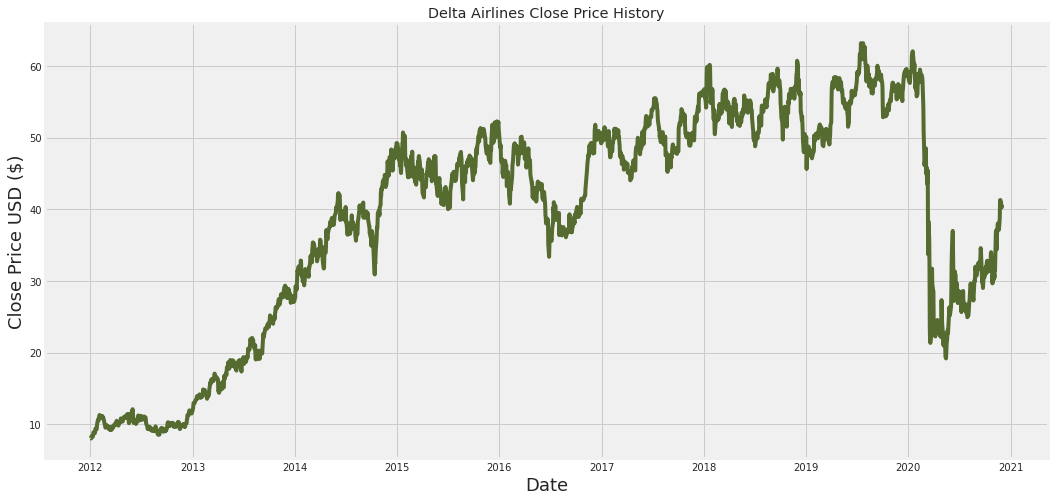

In [ ]:
# View the 
plt.figure(figsize=(16,8))
plt.title('Delta Airlines Close Price History')
plt.plot(dal_df['Close'], color='darkolivegreen')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Creating a new dataframe containing the close column of the DAL stocks
data = dal_df.filter(['Close'])
# Converting the DAL dataframe closing stocks to a numpy array
dal_dataset = data.values
# Getting the number of rows to train the model
training_data_len = int(np.ceil( len(dal_dataset) * .8 ))
# Viewing the length of the DAL training dataset
training_data_len

1796

In [ ]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dal_dataset)
# Viewing teh scaled data
scaled_data

array([[5.43966150e-04],
       [0.00000000e+00],
       [5.80235171e-03],
       ...,
       [5.99274730e-01],
       [5.84587489e-01],
       [5.89865812e-01]])

In [ ]:
# Creating the scaled training data set for DAL
train_data = scaled_data[0:int(training_data_len), :]
# Splitting the data into x_train and y_train data sets for DAL
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00054397, 0.        , 0.00580235, 0.00562102, 0.00489573,
       0.00471442, 0.01087941, 0.01559383, 0.01523119, 0.01305529,
       0.01650045, 0.02393472, 0.02538531, 0.02320942, 0.02484134,
       0.03535811, 0.03916591, 0.04315503, 0.05004534, 0.04605621,
       0.05240253, 0.05602901, 0.05965548, 0.05403444, 0.05367181,
       0.05403444, 0.05639165, 0.05222122, 0.05693562, 0.05312782,
       0.05113327, 0.05294651, 0.05113327, 0.03699003, 0.03481414,
       0.03046236, 0.02756119, 0.0299184 , 0.03427016, 0.03263826,
       0.02955576, 0.03191297, 0.03009973, 0.02447868, 0.02466001,
       0.02647326, 0.02466001, 0.02139618, 0.02357208, 0.02339075,
       0.02937443, 0.02175884, 0.02357208, 0.02756119, 0.03136899,
       0.02756119, 0.0291931 , 0.03390752, 0.03263826, 0.0360834 ])]
[0.03735266509866353]

[array([0.00054397, 0.        , 0.00580235, 0.00562102, 0.00489573,
       0.00471442, 0.01087941, 0.01559383, 0.01523119, 0.01305529,
       0.01650045, 0.02393472, 0.02

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Buliding the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1736/1736 [==============================] - 42s 24ms/step - loss: 0.0027


In [ ]:
# Creating the testing data set for DAL
test_data = scaled_data[training_data_len - 60: , :]
# Creating the data sets x_test and y_test for DAL
x_test = []
y_test = dal_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get predicted price values from the model 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Viewing the RMSE
rmse

2.962682537385777

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


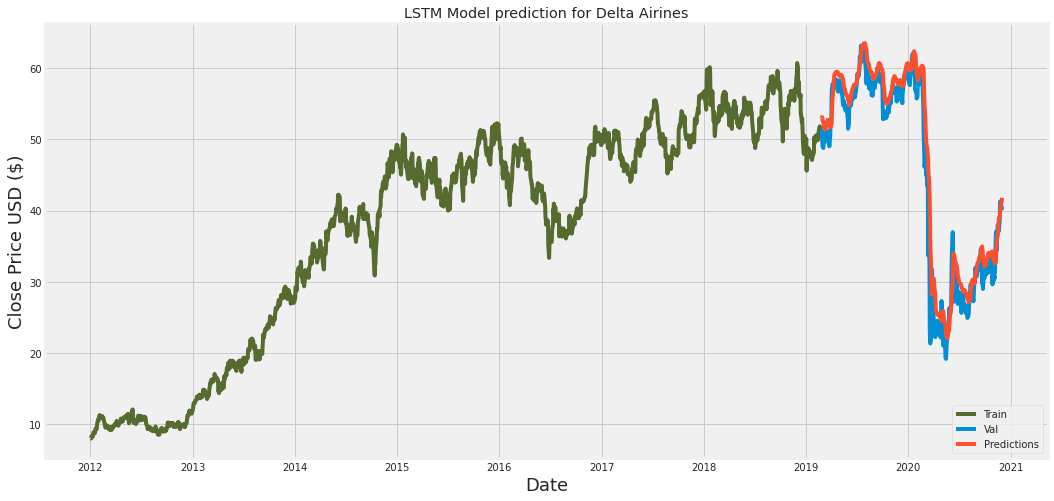

In [ ]:
# Plot the data
train = data[:training_data_len]
dal_valid = data[training_data_len:]
dal_valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model prediction for Delta Airines')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], color='darkolivegreen')
plt.plot(dal_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# View the closing and predicted closing prices
dal_valid

,Close,Predictions
Date,,
2019-02-25,51.410000,53.005211
2019-02-26,51.119999,53.100491
2019-02-27,50.430000,53.123184
2019-02-28,49.580002,53.015717
2019-03-01,48.959999,52.747654
...,...,...
2020-11-24,41.259998,39.486732
2020-11-25,41.290001,40.095524
2020-11-27,41.060001,40.782330


<h3><strong>Predicting the stock prices for ALK</h3>

In [ ]:
# Get the stock prices for Alaska Airlines (ALK) from 01-01-2012 to today
alk_df = DataReader('ALK', data_source='yahoo', start='2012-01-01', end=datetime.now())
# View the generated dataframe
alk_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,19.165001,18.445000,19.107500,18.487499,2173600.0,16.486877
2012-01-04,18.677500,18.170000,18.465000,18.607500,1688000.0,16.593887
2012-01-05,18.870001,18.397499,18.500000,18.809999,1483200.0,16.774479
2012-01-06,18.862499,18.442499,18.745001,18.465000,1942800.0,16.466810
2012-01-09,18.882500,18.400000,18.584999,18.690001,1644000.0,16.667461
...,...,...,...,...,...,...
2020-11-24,52.750000,50.259998,51.419998,52.369999,3327700.0,52.369999
2020-11-25,52.740002,50.820000,51.939999,52.470001,1661400.0,52.470001
2020-11-27,53.419998,51.389999,52.459999,51.549999,1338100.0,51.549999


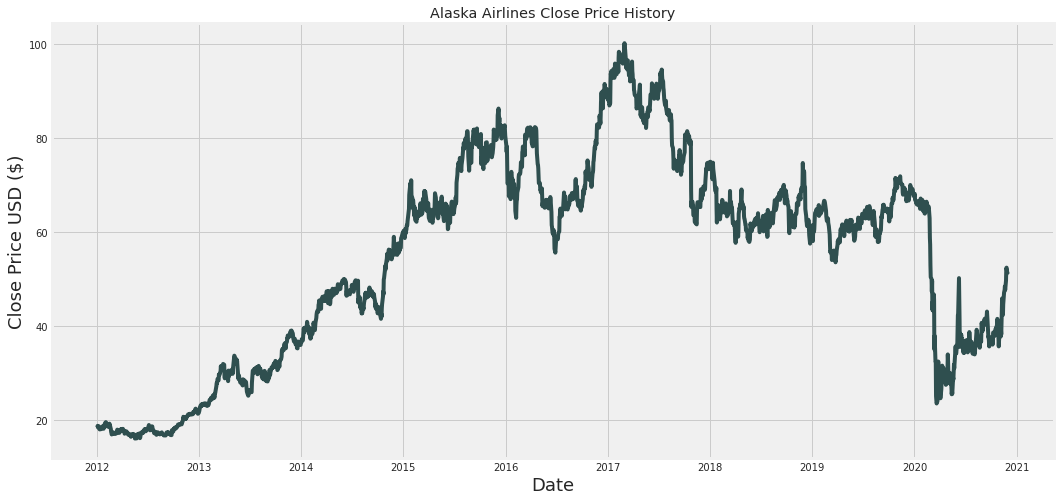

In [ ]:
# View the closing price history of DAL
plt.figure(figsize=(16,8))
plt.title('Alaska Airlines Close Price History')
plt.plot(alk_df['Close'], color='darkslategray')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Creating a new dataframe containing the close column of the ALK stocks
data = alk_df.filter(['Close'])
# Converting the ALK dataframe closing stocks to a numpy array
alk_dataset = data.values
# Getting the number of rows to train the model
training_data_len = int(np.ceil( len(alk_dataset) * .8 ))
# Viewing the length of the ALK training dataset
training_data_len

1796

In [ ]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(alk_dataset)
# Viewing teh scaled data
scaled_data

array([[0.02837531],
       [0.02980152],
       [0.03220821],
       ...,
       [0.42132161],
       [0.41442836],
       [0.41407178]])

In [ ]:
# Creating the scaled training data set for ALK
train_data = scaled_data[0:int(training_data_len), :]
# Splitting the data into x_train and y_train data sets for ALK
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02837531, 0.02980152, 0.03220821, 0.02810791, 0.03078203,
       0.02822677, 0.02510696, 0.02305682, 0.02409675, 0.02365106,
       0.02677087, 0.0285833 , 0.02709768, 0.02769194, 0.02929641,
       0.03280248, 0.02469098, 0.03018777, 0.03015808, 0.03485261,
       0.03945804, 0.03871523, 0.04150821, 0.03871523, 0.0369325 ,
       0.03363442, 0.0345555 , 0.0300095 , 0.03372355, 0.03446636,
       0.03075231, 0.03764559, 0.03559542, 0.02397789, 0.01687664,
       0.01432137, 0.01028048, 0.01426193, 0.01518303, 0.01239006,
       0.01521273, 0.01399453, 0.01221179, 0.0117661 , 0.01182552,
       0.01268718, 0.0150939 , 0.0129843 , 0.01669835, 0.01438078,
       0.02246256, 0.01601497, 0.01758973, 0.01842167, 0.01753031,
       0.01426193, 0.01479676, 0.02252199, 0.01961017, 0.02299738])]
[0.024007612529208994]

[array([0.02837531, 0.02980152, 0.03220821, 0.02810791, 0.03078203,
       0.02822677, 0.02510696, 0.02305682, 0.02409675, 0.02365106,
       0.02677087, 0.0285833 , 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Buliding the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1736/1736 [==============================] - 44s 26ms/step - loss: 0.0019


In [ ]:
# Creating the testing data set for ALK
test_data = scaled_data[training_data_len - 60: , :]
# Creating the data sets x_test and y_test for ALK
x_test = []
y_test = alk_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get predicted price values from the model 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Viewing the RMSE
rmse

3.3587177371177557

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


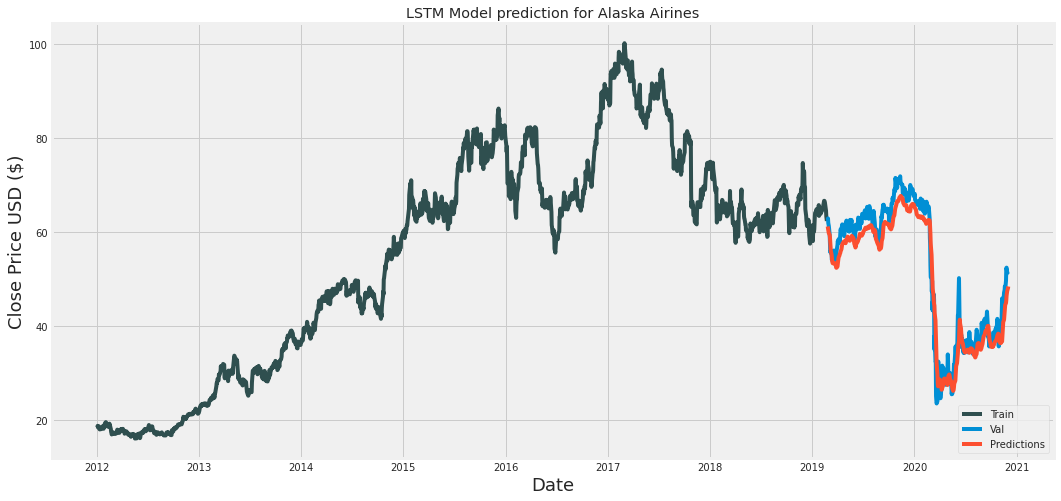

In [ ]:
# Plot the data
train = data[:training_data_len]
alk_valid = data[training_data_len:]
alk_valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model prediction for Alaska Airines')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], color='darkslategray')
plt.plot(alk_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# View the closing and predicted closing prices
alk_valid

,Close,Predictions
Date,,
2019-02-25,62.750000,61.239128
2019-02-26,62.939999,60.753662
2019-02-27,61.980000,60.441875
2019-02-28,61.700001,60.107124
2019-03-01,61.310001,59.783714
...,...,...
2020-11-24,52.369999,45.565815
2020-11-25,52.470001,46.494347
2020-11-27,51.549999,47.437275


<h3><strong>Predicting the stock prices for LUV<h3>

In [ ]:
# Get the stock prices for Southwest Airlines (DAL) from 01-01-2012 to today
luv_df = DataReader('LUV', data_source='yahoo', start='2012-01-01', end=datetime.now())
# View the generated dataframe
luv_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,8.760000,8.410000,8.720000,8.41,8808600.0,7.824934
2012-01-04,8.610000,8.220000,8.410000,8.60,7582700.0,8.001719
2012-01-05,8.640000,8.390000,8.570000,8.62,4892200.0,8.020328
2012-01-06,8.700000,8.520000,8.630000,8.52,3046800.0,7.927283
2012-01-09,8.680000,8.520000,8.520000,8.59,2906900.0,7.992411
...,...,...,...,...,...,...
2020-11-24,49.230000,47.650002,48.900002,48.25,12108800.0,48.250000
2020-11-25,48.570000,47.500000,48.470001,48.27,7281800.0,48.270000
2020-11-27,48.740002,47.650002,48.250000,47.73,4051900.0,47.730000


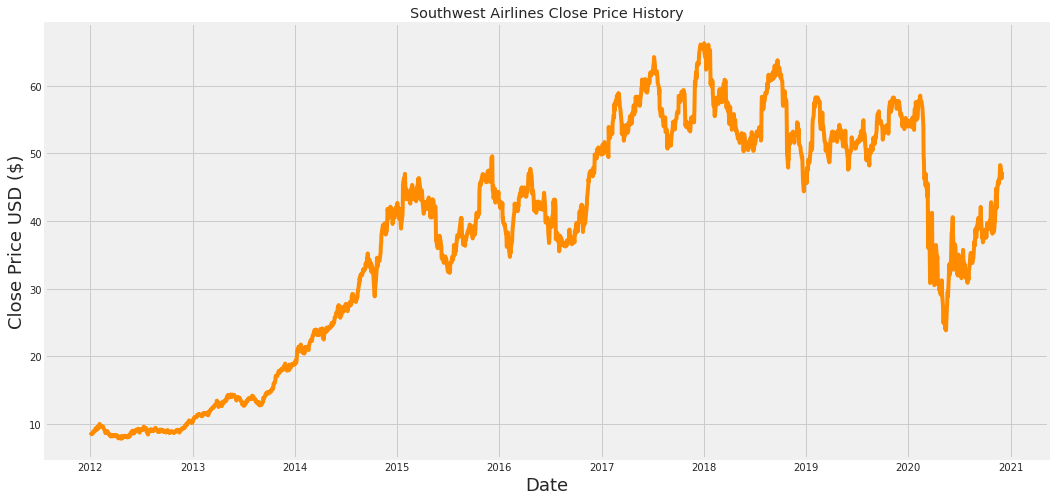

In [ ]:
# View the closing price history of LUV
plt.figure(figsize=(16,8))
plt.title('Southwest Airlines Close Price History')
plt.plot(luv_df['Close'], color='darkorange')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Creating a new dataframe containing the close column of the LUV stocks
data = luv_df.filter(['Close'])
# Converting the LUV dataframe closing stocks to a numpy array
luv_dataset = data.values
# Getting the number of rows to train the model
training_data_len = int(np.ceil( len(luv_dataset) * .8 ))
# Viewing the length of the DAL training dataset
training_data_len

1796

In [ ]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(luv_dataset)
# Viewing the scaled data
scaled_data

array([[0.00907378],
       [0.01232666],
       [0.01266906],
       ...,
       [0.68224617],
       [0.65844889],
       [0.67437082]])

In [ ]:
# Creating the scaled training data set for LUV
train_data = scaled_data[0:int(training_data_len), :]
# Splitting the data into x_train and y_train data sets for LUV
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00907378, 0.01232666, 0.01266906, 0.01095703, 0.01215545,
       0.01420989, 0.01712036, 0.01866119, 0.01643554, 0.01814757,
       0.01951721, 0.02431091, 0.02602293, 0.02396849, 0.02191405,
       0.02790618, 0.02568053, 0.02978942, 0.02568053, 0.0291046 ,
       0.03184386, 0.03201506, 0.03697997, 0.03201506, 0.03013183,
       0.02996062, 0.03252867, 0.02978942, 0.03150146, 0.02927581,
       0.02824858, 0.02927581, 0.02653655, 0.02088684, 0.01951721,
       0.01694915, 0.01369629, 0.01609313, 0.01831878, 0.01883238,
       0.01712036, 0.01848998, 0.0147235 , 0.01232666, 0.01044341,
       0.01061462, 0.0102722 , 0.00684814, 0.00907378, 0.00513611,
       0.0097586 , 0.00736176, 0.00907378, 0.00873139, 0.00753295,
       0.0053073 , 0.00599211, 0.00804657, 0.00599211, 0.00821776])]
[0.008902576561506975]

[array([0.00907378, 0.01232666, 0.01266906, 0.01095703, 0.01215545,
       0.01420989, 0.01712036, 0.01866119, 0.01643554, 0.01814757,
       0.01951721, 0.02431091, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Buliding the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1736/1736 [==============================] - 44s 26ms/step - loss: 0.0030


In [ ]:
# Creating the testing data set for LUV
test_data = scaled_data[training_data_len - 60: , :]
# Creating the data sets x_test and y_test for LUV
x_test = []
y_test = luv_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get predicted price values from the model 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Viewing the RMSE
rmse

2.4059082257681883

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


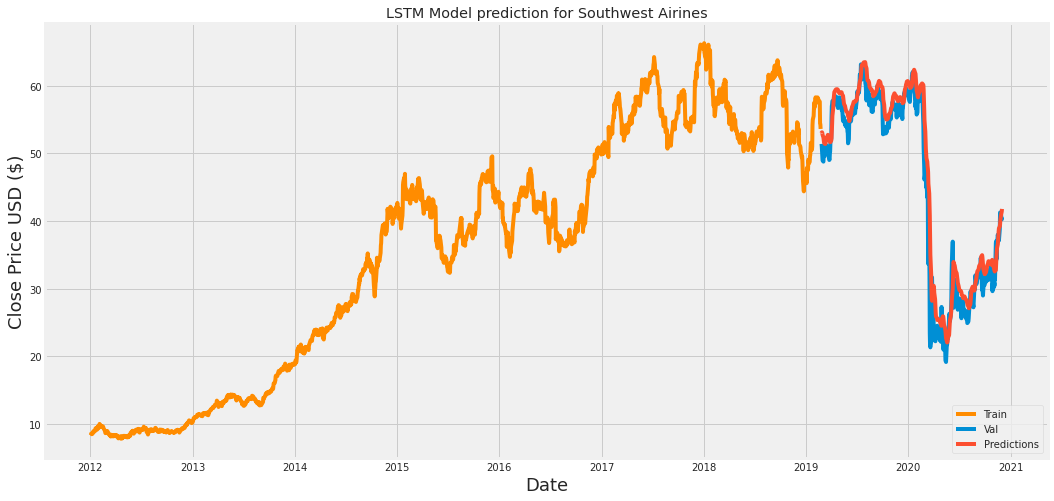

In [ ]:
# Plot the data
train = data[:training_data_len]
luv_valid = data[training_data_len:]
luv_valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model prediction for Southwest Airines')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], color='darkorange')
plt.plot(dal_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# View the closing and predicted closing prices
luv_valid

,Close,Predictions
Date,,
2019-02-25,53.959999,57.190022
2019-02-26,53.689999,56.539173
2019-02-27,53.849998,55.962170
2019-02-28,56.040001,55.514744
2019-03-01,54.340000,55.446865
...,...,...
2020-11-24,48.250000,47.101845
2020-11-25,48.270000,47.617619
2020-11-27,47.730000,48.141243
